In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display

In [3]:
input_file = 'train.csv'

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
# 6 - intern memory / 13 - ram
target = 'price_range'

df = pd.read_csv(input_file)

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Passo 1: Definir o número de classes a serem divididas para cada coluna


### Passo 2: Definir a amplitude de cada classe


### Passo 3: Definir os limites de cada classe


### Passo 4: Definir a frequência de cada classe

250
[506, 756, 1006, 1256, 1506, 1756, 2006, 2256, 2506, 2756, 3006, 3256, 3506, 3756, 4006]
[255, 505, 755, 1005, 1255, 1505, 1755, 2005, 2255, 2505, 2755, 3005, 3255, 3505, 3755]


,frequency,lower_limit,upper_limit,relative_frequency,cumulative_frequency,cumulative_frequency_percentage
1,137,255,506,6.850000,137,6.850000
2,145,505,756,7.250000,282,14.100000
3,117,755,1006,5.850000,399,19.950000
4,134,1005,1256,6.700000,533,26.650000
5,149,1255,1506,7.450000,682,34.100000
6,125,1505,1756,6.250000,807,40.350000
7,118,1755,2006,5.900000,925,46.250000
8,134,2005,2256,6.700000,1059,52.950000
9,156,2255,2506,7.800000,1215,60.750000
10,141,2505,2756,7.050000,1356,67.800000


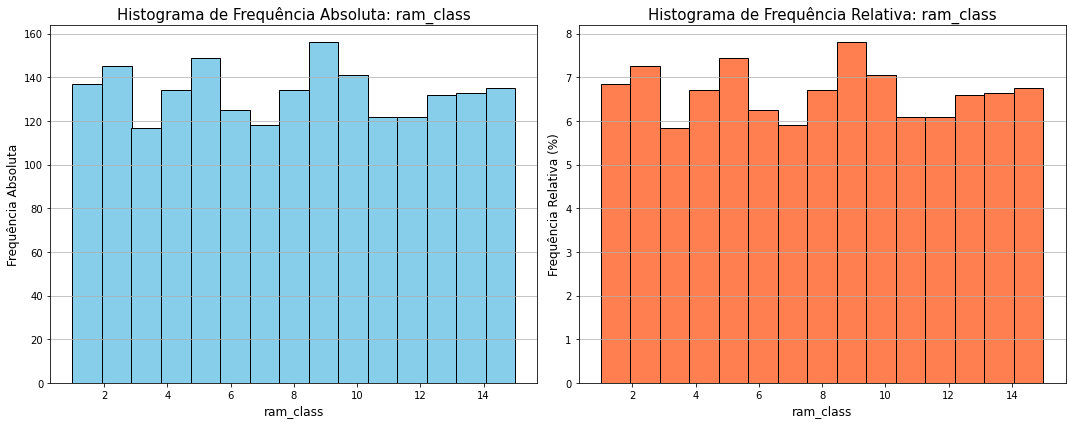

8
[10, 18, 26, 34, 42, 50, 58, 66]
[1, 10, 18, 26, 34, 42, 50, 58]


,frequency,lower_limit,upper_limit,relative_frequency,cumulative_frequency,cumulative_frequency_percentage
1,272,1,10,13.600000,272,13.600000
2,283,10,18,14.150000,555,27.750000
3,246,18,26,12.300000,801,40.050000
4,261,26,34,13.050000,1062,53.100000
5,236,34,42,11.800000,1298,64.900000
6,253,42,50,12.650000,1551,77.550000
7,259,50,58,12.950000,1810,90.500000
8,190,58,66,9.500000,2000,100.000000


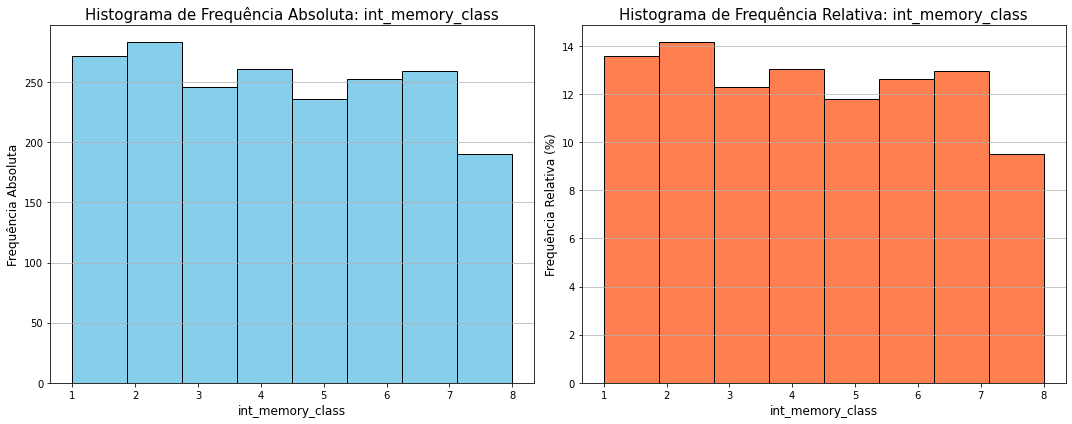

100
[601, 701, 801, 901, 1001, 1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001]
[500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]


,frequency,lower_limit,upper_limit,relative_frequency,cumulative_frequency,cumulative_frequency_percentage
1,148,500,601,7.400000,148,7.400000
2,138,600,701,6.900000,286,14.300000
3,136,700,801,6.800000,422,21.100000
4,143,800,901,7.150000,565,28.250000
5,132,900,1001,6.600000,697,34.850000
6,135,1000,1101,6.750000,832,41.600000
7,135,1100,1201,6.750000,967,48.350000
8,118,1200,1301,5.900000,1085,54.250000
9,121,1300,1401,6.050000,1206,60.300000
10,132,1400,1501,6.600000,1338,66.900000


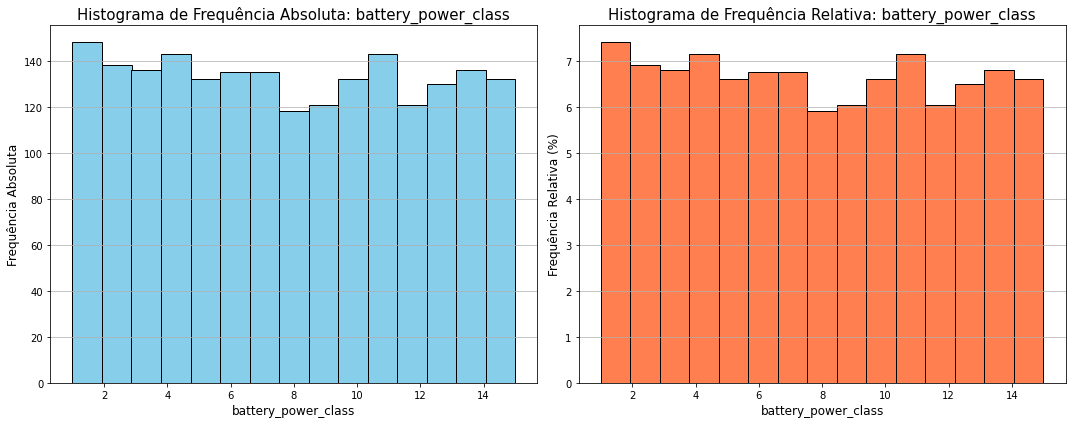

In [75]:
def estilo_tabela(val):
    return 'text-align: center;'

def plot_histogram(column, bins):
    # Set up the figure with two subplots
    plt.figure(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.3)

    # Histogram of absolute frequencies
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(df[column], bins=bins, edgecolor='black', color='skyblue')
    plt.title(f'Histograma de Frequência Absoluta: {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequência Absoluta', fontsize=12)
    plt.grid(axis='y', alpha=0.9)

    # Histogram of relative frequencies
    plt.subplot(1, 2, 2)
    weights = (np.ones_like(df[column]) / len(df[column])) * 100  # Weights to convert counts to percentages
    n, bins, patches = plt.hist(df[column], bins=bins, weights=weights, edgecolor='black', color='coral')
    plt.title(f'Histograma de Frequência Relativa: {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequência Relativa (%)', fontsize=12)
    plt.grid(axis='y', alpha=0.9)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
def describe(name_column, bins_lenght):
    if name_column == 'ram':
        # min = 256, max = 3998
        # o número de classes é 15
        bins_lenght = 15
        amplitude = math.ceil((3998 - 256)/bins_lenght)
        print(amplitude)
        max_limits = [256 + amplitude * i for i in range(1, 16)]
        min_limits = [255 + amplitude * i for i in range(0, 15)]
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['ram_class'] = pd.cut(df['ram'], bins=[255, 506, 756, 1006, 1256, 1506, 1756, 2006, 2256, 2506, 2756, 3006, 3256, 3506, 3756, 4006], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
        
        
        class_summary = df['ram_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['ram_class'])
        
        # salvar novo dataset como csv
        # df.to_csv('train_output.csv', index=False)
    if name_column == 'int_memory':
        # min = 2, max = 64
        # o número de classes é 8
        bins_lenght = 8
        amplitude = math.ceil((64 - 2)/bins_lenght)
        print(amplitude)
        max_limits = [2 + amplitude * i for i in range(1, 9)]
        min_limits = [2 + amplitude * i  for i in range(0, 8)]
        min_limits[0] = 1
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['int_memory_class'] = pd.cut(df['int_memory'], bins=[1, 9, 17, 25, 33, 41, 49, 57, 65], labels=[1, 2, 3, 4, 5, 6, 7, 8])
        
        class_summary = df['int_memory_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['int_memory_class'])
        
        # salvar novo dataset como csv
        # df.to_csv('train_output.csv', index=False)
    if name_column == 'battery_power':
        # min = 501, max = 1998
        # o número de classes é 15
        bins_lenght = 15
        amplitude = math.ceil((1998 - 501)/bins_lenght)
        print(amplitude)
        max_limits = [501 + amplitude * i for i in range(1, 16)]
        min_limits = [500 + amplitude * i for i in range(0, 15)]
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['battery_power_class'] = pd.cut(df['battery_power'], bins=[500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
        
        class_summary = df['battery_power_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['battery_power_class'])
        
        # salvar novo dataset como csv
        # df.to_csv('train_output.csv', index=False)
    if name_column == 'n_cores':
        # min = 1, max = 8
        # o número de classes é 8
        bins_lenght = 8
        amplitude = math.ceil((8 - 1)/bins_lenght)
        print(amplitude)
        max_limits = [1 + amplitude * i for i in range(1, 9)]
        min_limits = [1 + amplitude * i for i in range(0, 8)]
        min_limits[0] = 0
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['n_cores_class'] = pd.cut(df['n_cores'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=[1, 2, 3, 4, 5, 6, 7, 8])
        
        class_summary = df['n_cores_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['n_cores_class'])
        
    if name_column == 'clock_speed':
        # min = 5, max = 30
        # o número de classes é 5
        bins_lenght = 5
        amplitude = math.ceil((30 - 5)/bins_lenght)
        print(amplitude)
        max_limits = [5 + amplitude * i for i in range(1, 6)]
        min_limits = [5 + amplitude * i for i in range(0, 5)]
        min_limits[0] = 0
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['clock_speed_class'] = pd.cut(df['clock_speed'], bins=[5, 10, 15, 20, 25, 30], labels=[1, 2, 3, 4, 5])
        
        class_summary = df['clock_speed_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['clock_speed_class'])
        
        # salvar novo dataset como csv
        # df.to_csv('train_output.csv', index=False)
        
        
    # criar tabela visual com matplot com seguintes colunas: classe/rotulo, limite inferior, limite superior, frequencia absoluta, frequencia relativa, frequencia acumulada
    # Assuming df['ram_class'] is already created
    
    class_summary['lower_limit'] = min_limits
    class_summary['upper_limit'] = max_limits
    class_summary['relative_frequency'] = (class_summary['frequency'] / class_summary['frequency'].sum())*100
    class_summary['cumulative_frequency'] = class_summary['frequency'].cumsum()
    class_summary['cumulative_frequency_percentage'] = (class_summary['cumulative_frequency'] / class_summary['frequency'].sum())*100
    # print(class_summary.head(15))
    
    # Styling
    styled_df = class_summary.style.applymap(estilo_tabela) \
                                    .set_properties(**{'width': '100px'}) \
                                    .set_table_styles([{'selector': '', 'props': [('border', '1px solid black')]}])
    display(styled_df)
    plot_histogram(name_column + '_class', bins_lenght)
    # criar histograma com as classes
    # criar gráfico de pizza com as classes
    # criar gráfico de linha com as classes
    df.to_csv('train_output.csv', index=False)

columns = ['ram', 'int_memory', 'battery_power', 'n_cores', 'clock_speed']    
bins = [15, 8, 15, 8, 5]

for i in range(0, 3):

    describe(columns[i], bins[i])


